# Momemtum flux changes figure
- This script is used to visualize temporal variations of flux using different displacement heigh and roughness length;
- Simulations: CNTL, S1, S2, S3;

In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cftime
import string
import matplotlib.dates as mdates

In [7]:
output_dir = '/mnt/iusers01/fatpou01/sees01/a16404ys/scratch/output_analysis/project2/sp_roughness_sensitivity/kingscollege_variation/'
df = pd.read_csv(output_dir + 'result.csv')
df['time'] = pd.to_datetime(df['time'])
diurnal_mean = df.groupby('diurnal').mean().reset_index()
diurnal_5 = df.groupby('diurnal').quantile(0.05).reset_index()
diurnal_95 = df.groupby('diurnal').quantile(0.95).reset_index()
numeric_cols = df.columns
cols = numeric_cols.drop(['time','hour', 'minute','diurnal'])
seven_day_mean = df[cols].rolling(window=336, min_periods=48).mean().reset_index()
seven_day_5 = df[cols].rolling(window=336, min_periods=48).quantile(0.05).reset_index()
seven_day_95 = df[cols].rolling(window=336, min_periods=48).quantile(0.95).reset_index()
sequence = ['Rn', 'SWup', 'LWup', 'Qh', 'Qle', 'Qtau']
sequence2 = ['$R_{n}$', '$SW_{up}$', '$LW_{up}$', '$Q_{h}$', '$Q_{le}$', '$Q_{tau}$']
mid_time = ['2013-01-01T00:00:00']
#lc0 = '#083550'
#lc1 = '#006bac'
#lc2 = '#3da4e3'
#lc3 = '#6c64d4'
lc0 = '#1b9e77'
lc1 = '#d95f02'
lc2 = '#7570b3'
lc3 = '#e7298a'
lc = [lc0, lc1, lc2, lc3]
alpha = [0.2, 0.15, 0.1, 0.1]
labelfont = 6
linewidth = 0.5
labelcolor = '#6b6b6b'
padding = 4
metric = ['7-day mean', 'Diurnal mean']
pad = 1
xwidth = 0.5
length = 2
handletextpad = 0.5
entity = ['obs', 'def', 's1', 's3']
label1 = ['Observation: mean', 
          'CNTL: mean', 
          'S1: mean', 
          'S3: mean']
label2 = ['Observation: 5-95% range', 
          'CNTL: 5-95% range', 
          'S1: 5-95% range', 
          'S3: 5-95% range']
GRIDNAME = 'UK-KingsCollege'
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

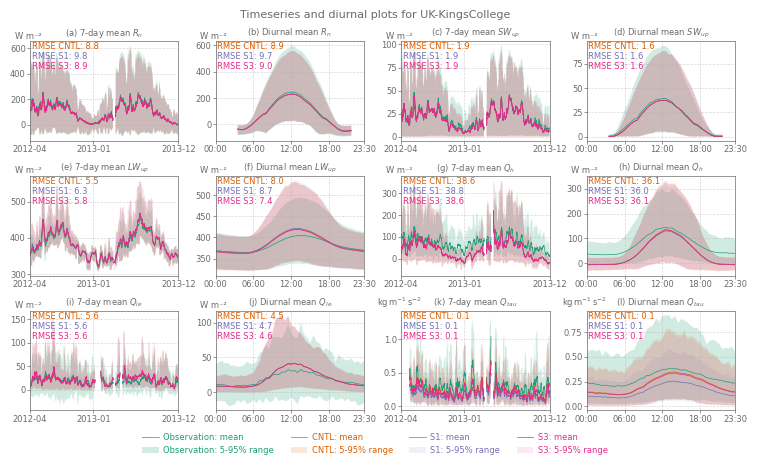

In [9]:
fig, axs = plt.subplots(3, 4, figsize=(7.5, 4.5))
axs = axs.flatten()
for i in range(12):
    col_name_obs = sequence[i//2]+'_' + entity[0]
    col_name_def = sequence[i//2]+'_' + entity[1]
    col_name_s1 = sequence[i//2]+'_' + entity[2]
    col_name_s3 = sequence[i//2]+'_' + entity[3]
    if i%2==0: # analyse period
        for j in range(4):
            col_name = sequence[i//2]+'_' + entity[j]
            axs[i].plot(df.time, seven_day_mean[col_name], label=label1[j], color=lc[j], linewidth=linewidth)
            axs[i].fill_between(df.time, seven_day_5[col_name], seven_day_95[col_name], alpha=alpha[j], color=lc[j],  edgecolor='none', label=label2[j])
            xticks = [df['time'].iloc[0]] + mid_time + [df['time'].iloc[-1]]
            axs[i].set_xticks(xticks)
            axs[i].set_xlim([df.time.iloc[0], df.time.iloc[-1]])
            axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

        axs[i].text(0.01,0.9,'RMSE CNTL: {:.1f}'.format(rmse(seven_day_mean[col_name_def] , seven_day_mean[col_name_obs])),
                    fontsize=labelfont, color=lc[1], horizontalalignment='left',
                           verticalalignment='bottom', transform=axs[i].transAxes)
        axs[i].text(0.01,0.8,'RMSE S1: {:.1f}'.format(rmse(seven_day_mean[col_name_s1] , seven_day_mean[col_name_obs])),
                    fontsize=labelfont, color=lc[2], horizontalalignment='left',
                           verticalalignment='bottom', transform=axs[i].transAxes)
        axs[i].text(0.01,0.7,'RMSE S3: {:.1f}'.format(rmse(seven_day_mean[col_name_s3] , seven_day_mean[col_name_obs])), 
                           fontsize=labelfont, color=lc[3], horizontalalignment='left',
                           verticalalignment='bottom', transform=axs[i].transAxes) 
            
    if i%2==1: # dinural time variation
        for j in range(4):
            col_name = sequence[i//2]+'_' + entity[j]
            axs[i].plot(diurnal_mean.diurnal, diurnal_mean[col_name], label=entity[j], color=lc[j], linewidth=linewidth)
            axs[i].fill_between(diurnal_mean.diurnal, diurnal_5[col_name], diurnal_95[col_name], alpha=alpha[j], color=lc[j],  edgecolor='none')
            axs[i].set_xticks([diurnal_mean.diurnal.iloc[0], '06:00', '12:00', '18:00', diurnal_mean.diurnal.iloc[-1]])
            axs[i].set_xlim([diurnal_mean.diurnal.iloc[0], diurnal_mean.diurnal.iloc[-1]])
             
        axs[i].text(0.01,0.9,'RMSE CNTL: {:.1f}'.format(rmse(diurnal_mean[col_name_def], diurnal_mean[col_name_obs])),
                    fontsize=labelfont, color=lc[1], horizontalalignment='left',
                           verticalalignment='bottom', transform=axs[i].transAxes)
        axs[i].text(0.01,0.8,'RMSE S1: {:.1f}'.format(rmse(diurnal_mean[col_name_s1] , diurnal_mean[col_name_obs])),
                    fontsize=labelfont, color=lc[2], horizontalalignment='left',
                           verticalalignment='bottom', transform=axs[i].transAxes)
        axs[i].text(0.01,0.7,'RMSE S3: {:.1f}'.format(rmse(diurnal_mean[col_name_s3], diurnal_mean[col_name_obs])), 
                           fontsize=labelfont, color=lc[3], horizontalalignment='left',
                           verticalalignment='bottom', transform=axs[i].transAxes)
        
    axs[i].set_title(f'({string.ascii_lowercase[i]}) {metric[i%2]} {sequence2[i//2]}',fontsize=labelfont,color=labelcolor, pad = padding)   
    axs[i].set_ylabel('W m⁻²',labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=labelcolor)
    axs[i].yaxis.set_label_coords(-0.05, 1.025)
    axs[i].tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelcolor=labelcolor, color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
    axs[i].tick_params(axis='x', which='both', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor,color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
    axs[i].spines['top'].set_color(labelcolor)
    axs[i].spines['right'].set_color(labelcolor)
    axs[i].spines['bottom'].set_color(labelcolor)
    axs[i].spines['left'].set_color(labelcolor)
    axs[i].spines['top'].set_linewidth(xwidth)
    axs[i].spines['right'].set_linewidth(xwidth)
    axs[i].spines['bottom'].set_linewidth(xwidth)
    axs[i].spines['left'].set_linewidth(xwidth)
    axs[i].grid(True,linestyle='--',linewidth=0.5, alpha=0.5)
    if i >=10:
        axs[i].set_ylabel(r'$\mathrm{kg \, m^{-1} \, s^{-2}}$', labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=labelcolor)
    else:    
        axs[i].set_ylabel('W m⁻²', labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=labelcolor)
    axs[i].yaxis.set_label_coords(-0.015, 1.01)
plt.subplots_adjust(left=0.04, right=0.98, bottom=0.1, top=0.92, wspace=0.25, hspace= 0.35)
lines, labels = axs[0].get_legend_handles_labels()
legend = fig.legend(lines, labels, bbox_to_anchor=(0.5, -0.015), loc='lower center', frameon=False, 
                        handletextpad=handletextpad, fontsize=labelfont, ncol=4)
llc = [lc0, lc0, lc1, lc1, lc2, lc2, lc3, lc3]
for i, text in enumerate(legend.get_texts()):
    text.set_color(llc[i])
plt.suptitle('Timeseries and diurnal plots for ' + GRIDNAME, fontsize=labelfont+2, color=labelcolor,x=0.5, y=0.99, ha='center', va='top')
fig.savefig(output_dir + 'roughness.png', dpi=300)
fig.savefig(output_dir + 'roughness.pdf', dpi=600)

# Description

In [28]:
archive_path = '/mnt/iusers01/fatpou01/sees01/a16404ys/scratch/Projects/archive/0project2/'
CNTL = archive_path + '0sp/UK-Kin_def/lnd/hist/UK-Kin_def.clm2.h0.2002-01-01-00000.nc'
S1 = archive_path + '0roughness_sensitivity/UK-Kin_S1/lnd/hist/UK-Kin_S1.clm2.h0.2002-01-01-00000.nc'
S3 = archive_path + '0roughness_sensitivity/UK-Kin_S3/lnd/hist/UK-Kin_S3.clm2.h0.2002-01-01-00000.nc'
var2 = ['FIRE_U', 'FSR', 'FSH_U', 'EFLX_LH_TOT_U', 'TAUX']
ds_cntl = xr.open_dataset(CNTL)
ds_s1 = xr.open_dataset(S1)
ds_s3 = xr.open_dataset(S3)
ds_cntl['time']=ds_cntl['time'].dt.round('min')
ds_cntl['time']=ds_cntl['time'].dt.ceil('min')
ds_s1['time']=ds_s1['time'].dt.round('min')
ds_s1['time']=ds_s1['time'].dt.ceil('min')
ds_s3['time']=ds_s3['time'].dt.round('min')
ds_s3['time']=ds_s3['time'].dt.ceil('min')

sliced_ds_cntl = ds_cntl.sel(time=slice(start_time, end_time))[var2]
df_cntl = sliced_ds_cntl.to_dataframe().reset_index()
df_cntl.drop(columns=['lndgrid'], inplace=True)
df_cntl = df_cntl.rename(columns={'FIRE_U': 'LWup_def', 'FSR': 'SWup_def','FSH_U': 'Qh_def', 'EFLX_LH_TOT_U': 'Qle_def', 'TAUX': 'Qtau_def'})
df_cntl['Qtau_def'] = - df_cntl['Qtau_def']

sliced_ds_s1 = ds_s1.sel(time=slice(start_time, end_time))[var2]
df_s1 = sliced_ds_s1.to_dataframe().reset_index()
df_s1.drop(columns=['lndgrid'], inplace=True)
df_s1 = df_s1.rename(columns={'FIRE_U': 'LWup_s1', 'FSR': 'SWup_s1','FSH_U': 'Qh_s1', 'EFLX_LH_TOT_U': 'Qle_s1', 'TAUX': 'Qtau_s1'})
df_s1['Qtau_s1'] = - df_s1['Qtau_s1']

sliced_ds_s3 = ds_s3.sel(time=slice(start_time, end_time))[var2]
df_s3 = sliced_ds_s3.to_dataframe().reset_index()
df_s3.drop(columns=['lndgrid'], inplace=True)
df_s3 = df_s3.rename(columns={'FIRE_U': 'LWup_s3', 'FSR': 'SWup_s3','FSH_U': 'Qh_s3', 'EFLX_LH_TOT_U': 'Qle_s3', 'TAUX': 'Qtau_s3'})
df_s3['Qtau_s3'] = - df_s3['Qtau_s3']
df = pd.merge(df_cntl, df_s1, on='time').merge(df_s3, on='time')

In [29]:
df_qh = df[['time', 'Qh_def', 'Qh_s1', 'Qh_s3']].set_index('time')
start_time = '2012-12-25 00:00:00'
end_time = '2012-12-26 00:00:00'
df_qh_sel = df_qh.loc[start_time:end_time]
df_qh_sel

,Qh_def,Qh_s1,Qh_s3
time,,,
2012-12-25 00:00:00,-9.193590,-8.767988,-9.125687
2012-12-25 00:30:00,-7.988470,-7.561173,-7.916032
2012-12-25 01:00:00,-4.111451,-3.840761,-4.059059
2012-12-25 01:30:00,-5.129878,-4.484691,-5.030908
2012-12-25 02:00:00,-6.226295,-5.303814,-6.092082
2012-12-25 02:30:00,-2.260713,-1.845207,-2.184155
2012-12-25 03:00:00,-5.997341,-5.152071,-5.875578
2012-12-25 03:30:00,-18.107038,-17.047262,-17.947992
2012-12-25 04:00:00,-17.166037,-15.591882,-16.959425


In [31]:
np.round(df_qh_sel.mean(),2)

Qh_def   -8.91
Qh_s1    -7.45
Qh_s3    -8.72
dtype: float32

In [33]:
df_qtau = df[['time', 'Qtau_def', 'Qtau_s1', 'Qtau_s3']].set_index('time')
start_time = '2012-12-25 00:00:00'
end_time = '2012-12-26 00:00:00'
df_qtau_sel = df_qtau.loc[start_time:end_time]
df_qtau_sel

,Qtau_def,Qtau_s1,Qtau_s3
time,,,
2012-12-25 00:00:00,0.237218,0.169567,0.228339
2012-12-25 00:30:00,0.228437,0.162873,0.219810
2012-12-25 01:00:00,0.206508,0.147864,0.198825
2012-12-25 01:30:00,0.216446,0.153652,0.208183
2012-12-25 02:00:00,0.215651,0.154151,0.207579
2012-12-25 02:30:00,0.242759,0.174618,0.233837
2012-12-25 03:00:00,0.163603,0.116908,0.157486
2012-12-25 03:30:00,0.215667,0.154162,0.207594
2012-12-25 04:00:00,0.155411,0.107551,0.149088


In [34]:
np.round(df_qtau_sel.mean(),2)

Qtau_def    0.28
Qtau_s1     0.20
Qtau_s3     0.27
dtype: float32